In [1]:
print(1)

1


In [9]:
import pandas as pd
import numpy as np
import random
import math
import gym
from gym import spaces
import matplotlib.pyplot as plt



In [6]:
class SimpleMazeEnv(gym.Env):
    def __init__(self):
        super(SimpleMazeEnv, self).__init__() # ?
        self.maze = np.array([
            [0, 1, 0, 0, 0],
            [0, 1, 0, 1, 0],
            [0, 0, 0, 1, 0],
            [1, 1, 0, 1, 0],
            [0, 0, 0, 0, 0]
        ])
        self.start_state = (0, 0)
        self.goal_state = (4, 4)
        self.state = self.start_state

        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=0, high=1, shape=self.maze.shape, dtype=int)

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            x = max(0, x - 1)
        elif action == 1:  # Down
            x = min(self.maze.shape[0] - 1, x + 1)
        elif action == 2:  # Left
            y = max(0, y - 1)
        elif action == 3:  # Right
            y = min(self.maze.shape[1] - 1, y + 1)

        if self.maze[x, y] == 1:
            x, y = self.state  # Hit a wall, stay in place

        self.state = (x, y)
        done = self.state == self.goal_state
        reward = 1 if done else -0.1

        return self.state, reward, done, {}

    def render(self, mode='human'):
        maze_copy = self.maze.copy()
        maze_copy[self.state] = 2
        print(maze_copy)

env = SimpleMazeEnv()

In [7]:
# Q-러닝 파라미터
alpha = 0.1
gamma = 0.6
epsilon = 0.1
num_episodes = 1000

# Q-테이블 초기화
q_table = np.zeros((env.maze.shape[0], env.maze.shape[1], env.action_space.n))

# Q-러닝 알고리즘
def q_learning(env, q_table, alpha, gamma, epsilon, num_episodes):
    rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Exploration
            else:
                action = np.argmax(q_table[state[0], state[1]])  # Exploitation

            next_state, reward, done, _ = env.step(action)

            old_value = q_table[state[0], state[1], action]
            next_max = np.max(q_table[next_state[0], next_state[1]])

            new_value = old_value + alpha * (reward + gamma * next_max - old_value)
            q_table[state[0], state[1], action] = new_value

            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    return rewards

rewards = q_learning(env, q_table, alpha, gamma, epsilon, num_episodes)

[[2 1 0 0 0]
 [0 1 0 1 0]
 [0 0 0 1 0]
 [1 1 0 1 0]
 [0 0 0 0 0]]
[[0 1 0 0 0]
 [2 1 0 1 0]
 [0 0 0 1 0]
 [1 1 0 1 0]
 [0 0 0 0 0]]
[[0 1 0 0 0]
 [0 1 0 1 0]
 [2 0 0 1 0]
 [1 1 0 1 0]
 [0 0 0 0 0]]
[[0 1 0 0 0]
 [0 1 0 1 0]
 [0 2 0 1 0]
 [1 1 0 1 0]
 [0 0 0 0 0]]
[[0 1 0 0 0]
 [0 1 0 1 0]
 [0 0 2 1 0]
 [1 1 0 1 0]
 [0 0 0 0 0]]
[[0 1 0 0 0]
 [0 1 0 1 0]
 [0 0 0 1 0]
 [1 1 2 1 0]
 [0 0 0 0 0]]
[[0 1 0 0 0]
 [0 1 0 1 0]
 [0 0 0 1 0]
 [1 1 0 1 0]
 [0 0 2 0 0]]
[[0 1 0 0 0]
 [0 1 0 1 0]
 [0 0 0 1 0]
 [1 1 0 1 0]
 [0 0 0 2 0]]
[[0 1 0 0 0]
 [0 1 0 1 0]
 [0 0 0 1 0]
 [1 1 0 1 0]
 [0 0 0 0 2]]


Text(0.5, 0, 'Episode')

Text(0, 0.5, 'Total Reward')

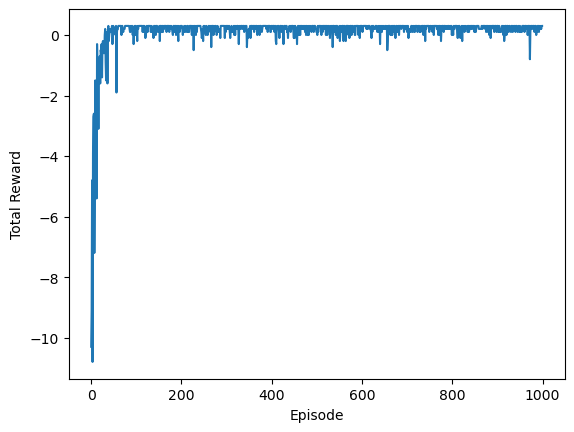

In [10]:
# Cell 3: 학습 결과 확인 및 시각화
# 학습 후 경로 확인
state = env.reset()
done = False
env.render()

while not done:
    action = np.argmax(q_table[state[0], state[1]])
    state, _, done, _ = env.step(action)
    env.render()

# 보상 그래프 출력
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()